# Data Analysis for Breast Cancer
Find correlations between the cause for malignant and benign tumors

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# Read in data
df = pd.read_csv(r'C:\Users\natha\Downloads\archive\breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Inspect columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
# Check data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Check for missing data
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Single out aspects regarding size and surface to analyze cancer type
df = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,0.14250
4,M,20.29,14.34,135.10,1297.0,0.10030


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

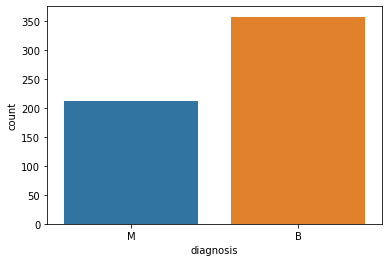

In [9]:
# Plot number of malignent vs. benign tumors
plt.figure()
sns.countplot(x='diagnosis',data=df)


In [10]:
# Let's look at the correlation between the columns
df.corr().style.background_gradient(cmap='RdPu')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000


<AxesSubplot:xlabel='radius_mean', ylabel='area_mean'>

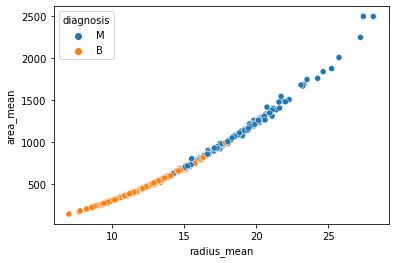

In [11]:
# Plot radius_mean vs area_mean via seaborn
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

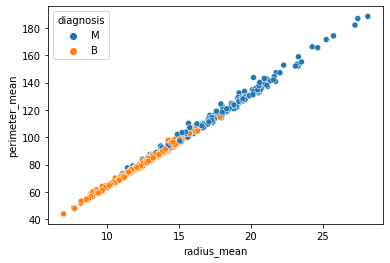

In [12]:
# Plot radius_mean vs perimeter_mean via seaborn
sns.scatterplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis')

<AxesSubplot:xlabel='smoothness_mean', ylabel='texture_mean'>

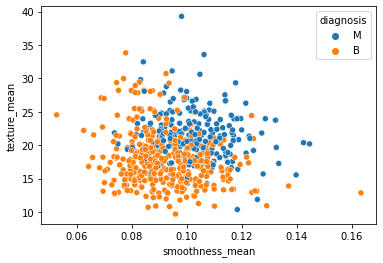

In [13]:
# Plot smoothness_mean vs texture_mean via seaborn
sns.scatterplot(data=df, x='smoothness_mean', y='texture_mean', hue='diagnosis')

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

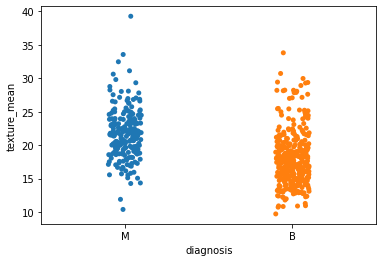

In [14]:
# Plot smoothness_mean vs texture_mean via seaborn
sns.stripplot(x='diagnosis', y='texture_mean',data=df)

In [15]:
df['texture_mean'].mean()

19.289648506151142

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

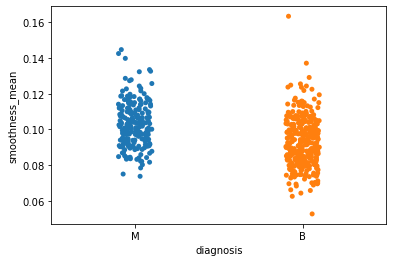

In [16]:
# Plot smoothness_mean vs texture_mean via seaborn
sns.stripplot(x='diagnosis', y='smoothness_mean',data=df)

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

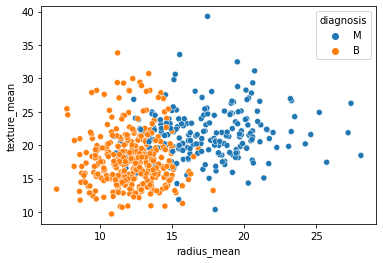

In [19]:
# Scatter plot radius_mean vs. texture_mean
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')

### Conclusion
There is a strong correlation between the size of tumors and its classification of being either benign vs. malignant. The larger the tumor directly increases its chance to be malignant.

Another aspect to take notice of is how the surface of the tumor has a role in determining its harmfulness. Although the correlation is much weaker, there is a higher likelihood that benign tumors will have a smoother surface.